# Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols
from scipy.stats import skew, stats


import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('student_performance_dataset.csv')

In [3]:
# Loking at the dataset
dataset.head(100)

,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
0,22.5,4.9,4,No,94.1
1,19.3,6.4,5,No,96.2
2,23.2,6.5,5,No,85.8
3,27.6,5.8,1,Yes,99.8
4,18.8,6.8,0,Yes,83.5
...,...,...,...,...,...
95,12.7,7.6,3,No,78.6
96,21.5,5.7,4,No,88.2
97,21.3,7.2,3,Yes,83.5
98,20.0,7.1,0,No,92.0


In [4]:
dataset.describe(include='all') # summary overview of dataset

,Hours_Studied,Hours_Sleep,Caffeine_Intake,Stress,Exam_Score
count,100.000000,100.000000,100.000000,100,100.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,NaN,68,NaN
mean,19.484000,7.009000,1.940000,NaN,88.735000
std,4.540541,1.378998,1.625678,NaN,7.518037
min,6.900000,4.100000,0.000000,NaN,61.300000
25%,17.000000,5.800000,1.000000,NaN,83.850000
50%,19.350000,7.100000,2.000000,NaN,88.600000
75%,22.050000,7.825000,3.000000,NaN,93.950000


In [5]:
# Looking at unique values
dataset.nunique()

Hours_Studied      79
Hours_Sleep        45
Caffeine_Intake     7
Stress              2
Exam_Score         72
dtype: int64

In [6]:
df = pd.DataFrame(dataset)# create a pd dataframe

rows = df.shape[0]  #number of rows
columns =  df.shape[1]  #number of comlumns
print("Dataset:",df.shape, "\nNumber of rows:", rows, "\nNumber of Columns:", columns)

Dataset: (100, 5) 
Number of rows: 100 
Number of Columns: 5


In [7]:
missing_values = df.isnull().values.any() #contains missing value
print("\n Contain Missing values: ?", missing_values)
print("\n Columns with missed values: \n", df.isna().any())


 Contain Missing values: ? False

 Columns with missed values: 
 Hours_Studied      False
Hours_Sleep        False
Caffeine_Intake    False
Stress             False
Exam_Score         False
dtype: bool


In [8]:
df.info()#identify the type of data to handle with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    100 non-null    float64
 1   Hours_Sleep      100 non-null    float64
 2   Caffeine_Intake  100 non-null    int64  
 3   Stress           100 non-null    object 
 4   Exam_Score       100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


# Descriptive statistics

In [9]:
#mappin 'No' to 0 and 'Yes' to 1
df = pd.DataFrame(dataset)
df['Stress_Encoded'] = df['Stress'].map({'No': 0, 'Yes': 1})

# calculate for all numerical columns
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]

print("\n Mean (Average):\n", mean)
print("\n Median (Middle Value):\n", median)
print("\n Mode (Most Frequent):\n", mode)

std_value = df.std(numeric_only=True)
print("\n Standard Deviation:\n", std_value)


 Mean (Average):
 Hours_Studied      19.484
Hours_Sleep         7.009
Caffeine_Intake     1.940
Exam_Score         88.735
Stress_Encoded      0.320
dtype: float64

 Median (Middle Value):
 Hours_Studied      19.35
Hours_Sleep         7.10
Caffeine_Intake     2.00
Exam_Score         88.60
Stress_Encoded      0.00
dtype: float64

 Mode (Most Frequent):
 Hours_Studied       17.7
Hours_Sleep          7.3
Caffeine_Intake      1.0
Exam_Score         100.0
Stress_Encoded       0.0
Name: 0, dtype: float64

 Standard Deviation:
 Hours_Studied      4.540541
Hours_Sleep        1.378998
Caffeine_Intake    1.625678
Exam_Score         7.518037
Stress_Encoded     0.468826
dtype: float64


# statistical graphics to better visualize

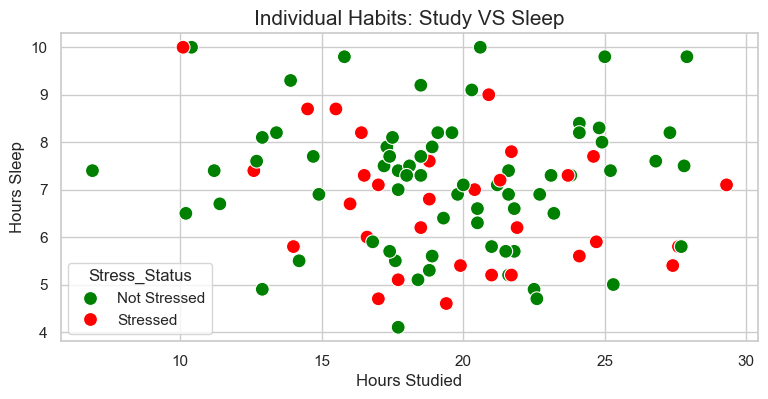

In [10]:
df['Stress_Status'] = df['Stress'].map({'No': 'Not Stressed', 'Yes': 'Stressed'})
sns.set_theme(style="whitegrid")

#Correlation between hours study vs sleep
plt.figure(figsize=(9, 4))
sns.scatterplot(
                data=df, x='Hours_Studied', y='Hours_Sleep', hue='Stress_Status', 
                palette={'Stressed': 'red', 'Not Stressed': 'green'}, s=100
                )
plt.title('Individual Habits: Study VS Sleep', fontsize=15)
plt.xlabel('Hours Studied')
plt.ylabel('Hours Sleep')
plt.show()



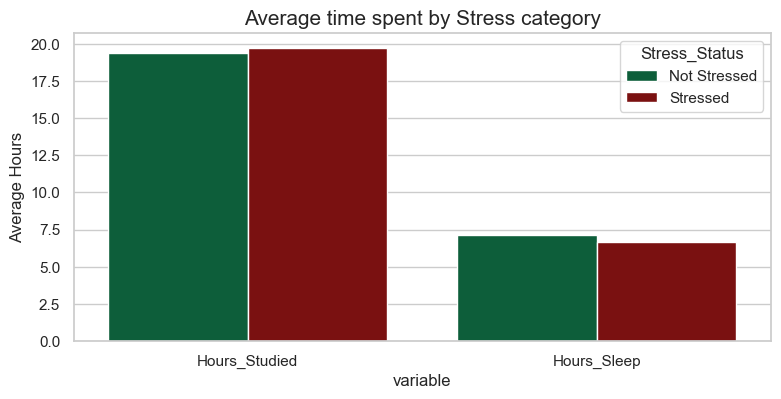

In [11]:
plt.figure(figsize=(9, 4))
average_df = df.melt(id_vars='Stress_Status', value_vars=['Hours_Studied', 'Hours_Sleep'])#comparison of averages
sns.barplot(data=average_df, x='variable', y='value', hue='Stress_Status', palette=['#006b3c', '#8B0000'], errorbar=None)
plt.title('Average time spent by Stress category', fontsize=15)
plt.ylabel('Average Hours')
plt.show()

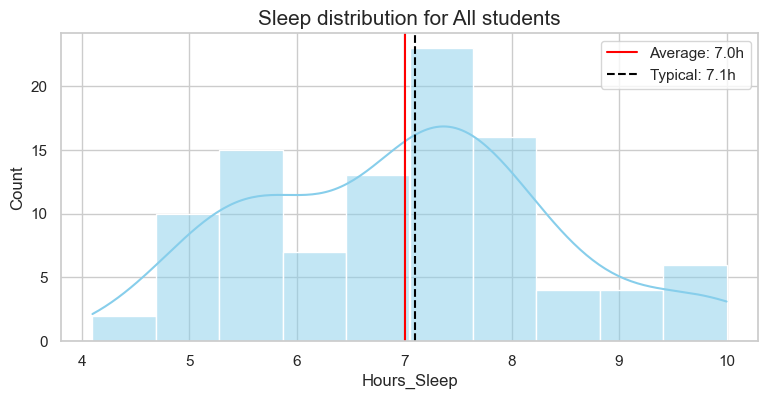

In [14]:
plt.figure(figsize=(9, 4))
sns.histplot(data=df, x='Hours_Sleep', kde=True, color='skyblue', bins=10)

# Fixed f-string for Average
plt.axvline(df['Hours_Sleep'].mean(), color='red', 
            linestyle='-', label=f'Average: {df["Hours_Sleep"].mean():.1f}h')

# Fixed f-string for Typical (Median)
plt.axvline(df['Hours_Sleep'].median(), color='black', 
            linestyle='--', label=f'Typical: {df["Hours_Sleep"].median():.1f}h')

plt.title('Sleep distribution for All students', fontsize=15)
plt.legend()
plt.show()


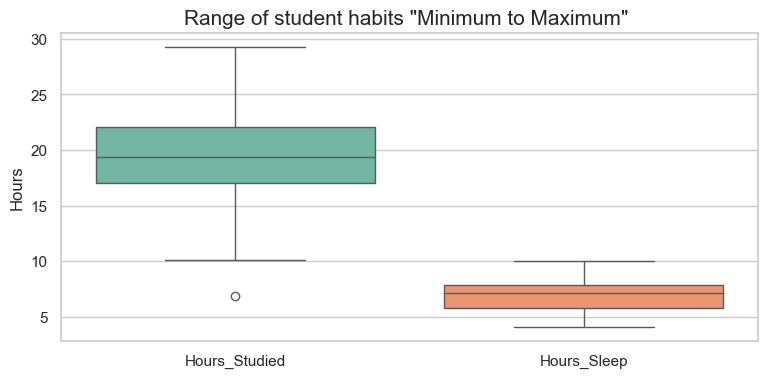

In [15]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=df[['Hours_Studied', 'Hours_Sleep']], palette='Set2')
plt.title('Range of student habits "Minimum to Maximum" ', fontsize=15)
plt.ylabel('Hours')
plt.show()

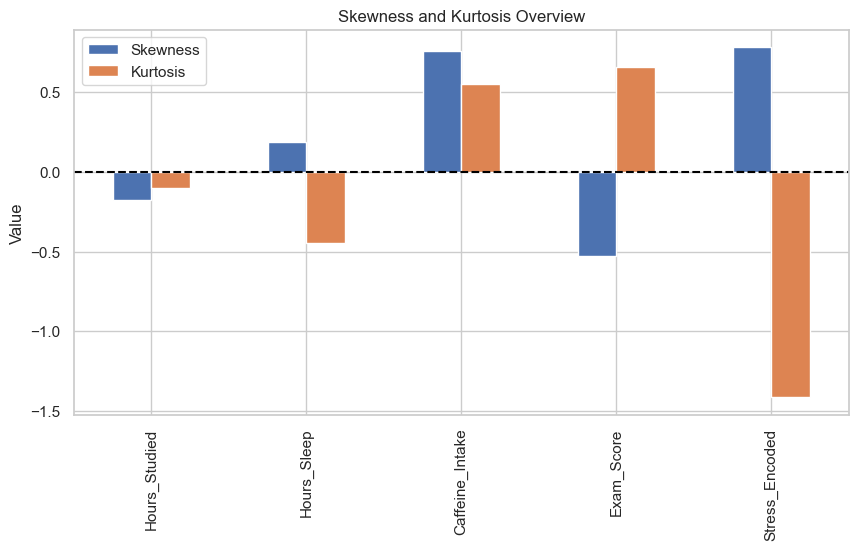

In [16]:
summary = df.skew(numeric_only=True).to_frame(name='Skewness')#asymmetry of data for each column
summary['Kurtosis'] = df.kurtosis(numeric_only=True)#mesure prencense of outliers
#plot
summary.plot(kind='bar', figsize=(10, 5), title='Skewness and Kurtosis Overview')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Value')
plt.grid(True)

In [17]:
#display sum of miss value per column
print("\n","Missing Values per column", df.isnull().sum())

#Total 
print("\n","Total:", df.isnull().sum().sum())

#display total percentage
print("\n", np.round(df.isnull().sum().mean(), 4), " % Total percentage of missing values")



 Missing Values per column Hours_Studied      0
Hours_Sleep        0
Caffeine_Intake    0
Stress             0
Exam_Score         0
Stress_Encoded     0
Stress_Status      0
dtype: int64

 Total: 0

 0.0  % Total percentage of missing values


In [18]:
#one way ANOVA test using OLS Model
model = ols('Exam_Score~Stress', data=df).fit()
anova_test = sm.stats.anova_lm(model, typ=2)

print("\n \n", "model summary: \n", model.summary(), "\n \n Anova test: -------- \n",anova_test,)

print("\n Non parametric test: -----")

group_yes = df[df['Stress'] == 'Yes']['Exam_Score']
group_no = df[df['Stress'] == 'No']['Exam_Score']

h_stat, p_val = stats.kruskal(group_yes, group_no)

print(f"H-Statistic: {h_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# P value > alpha here
if p_val < 0.05:
    print("\n Conclusion: Both tests confirm a significant difference.")
else:
    print("\n Conclusion: No significant difference found.")


 
 model summary: 
                             OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     8.470
Date:                Wed, 24 Dec 2025   Prob (F-statistic):            0.00447
Time:                        18:46:30   Log-Likelihood:                -338.98
No. Observations:                 100   AIC:                             682.0
Df Residuals:                      98   BIC:                             687.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        90.1824 

Shapiro-Wilk Test: p-value = 0.0048
Distribution is not Normal (Non-Parametric test reject Ho)


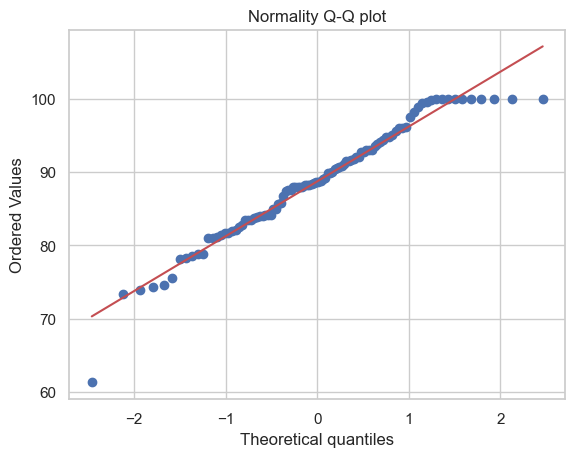

In [24]:
#test for normality shapiro wilk
stat, p_value = stats.shapiro(df['Exam_Score'])

print(f"Shapiro-Wilk Test: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Data distribuition looks normal")
else:
    print("Distribution is not Normal (Non-Parametric test reject Ho)")
    
stats.probplot(df['Exam_Score'], dist="norm", plot=plt)
plt.title("Normality Q-Q plot")
plt.show()

# Probability and Bayes T.

In [19]:
p_stressed = 0.25 #probability a student is stressed
p_not_stressed = 1 - p_stressed #probability a student is not stressed
p_flag_stressed = 0.80   #probability app flag given if student is stressed
p_flag_not_stressed = 0.10 #probability app flag if student is not stressed false positive

# calculate total probability of being flagged
p_flagged = (p_flag_stressed * p_stressed) + (p_flag_not_stressed * p_not_stressed)

#appling bayes theorem to find a posterior probability
p_stressed_flagged = (p_flag_stressed * p_stressed) / p_flagged

print(f"Probability of stress:{p_stressed:.2f}")
print(f"Total probability of being flagged:{p_flagged:.3f}")
print(f"Probability student is stressed if they were flagged:{p_stressed_flagged:.4f}")
print(f"Conclusion: there is a {p_stressed_flagged * 100:.2f}% chance the student is stressed.")

Probability of stress:0.25
Total probability of being flagged:0.275
Probability student is stressed if they were flagged:0.7273
Conclusion: there is a 72.73% chance the student is stressed.


# Regression Model

In [20]:
y = df['Exam_Score']
X = df[['Hours_Studied', 'Hours_Sleep', 'Caffeine_Intake']]

#adding bias constant
X = sm.add_constant(X)

#used 80% to Train, 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model builded and training
model = sm.OLS(y_train, X_train).fit()

#predicting on test dataset
y_pred = model.predict(X_test)

#evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (Test Accuracy):{r2_test:.3f}")

Root Mean Squared Error (RMSE): 6.56
R-Squared (Test Accuracy):0.457


Variance: 
 Hours_Studied        20.616509
Hours_Sleep           1.901635
Caffeine_Intake       2.642828
Exam_Score           56.520884
Stress_Encoded        0.219798
Medical_Cost       2197.979798
dtype: float64

 Covariance matrix  
                  Hours_Studied  Hours_Sleep  Caffeine_Intake  Exam_Score  \
Hours_Studied        20.616509    -0.724097        -0.675717   24.198040   
Hours_Sleep          -0.724097     1.901635         0.050040    2.025237   
Caffeine_Intake      -0.675717     0.050040         2.642828   -3.140303   
Exam_Score           24.198040     2.025237        -3.140303   56.520884   
Stress_Encoded        0.079919    -0.099879        -0.000808   -0.994141   
Medical_Cost          7.991919    -9.987879        -0.080808  -99.414141   

                 Stress_Encoded  Medical_Cost  
Hours_Studied          0.079919      7.991919  
Hours_Sleep           -0.099879     -9.987879  
Caffeine_Intake       -0.000808     -0.080808  
Exam_Score            -0.994141    -99.

Text(0.5, 1.0, 'Covariance matrix Heatmap')

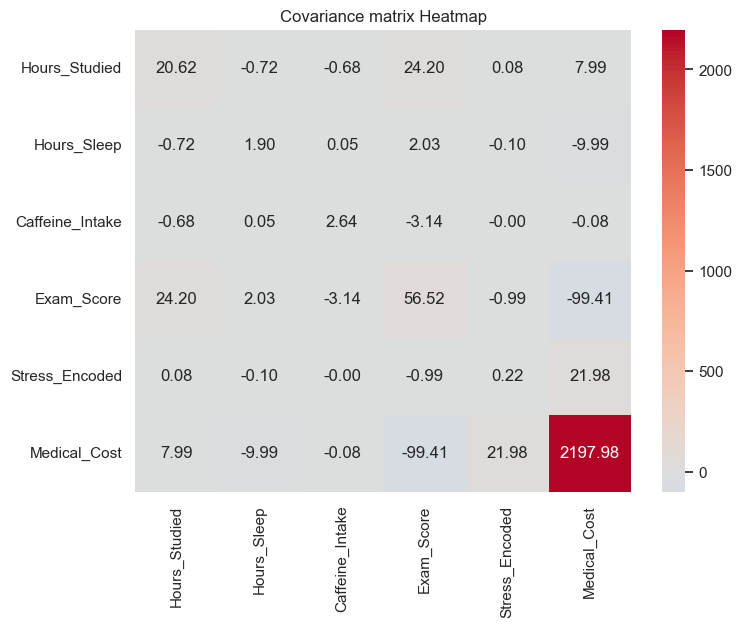

In [31]:
#standard deviation squared
variance = df.var(numeric_only=True)

#covariance matrix
covariance = df.cov(numeric_only=True)

# medical cost variance
prob_sick = df['Stress'].value_counts(normalize=True)['Yes']
cost_sick = 100 
cost_healthy = 0

#Calculate Variance
var_medical = prob_sick * (1 - prob_sick) * ((cost_sick - cost_healthy) ** 2)

print("Variance: \n", variance)
print("\n Covariance matrix  \n", covariance)

expected_value = prob_sick * cost_sick  # Since cost_healthy is 0
print(f"\nExpected Medical Cost per Student: €{expected_value:.2f}")
print(f"\nMedical Cost Variance: {var_medical:.2f}")

df['Medical_Cost'] = df['Stress'].map({'Yes': 100, 'No': 0})
print("\n Covariance with Medical Cost:\n")
print(df[['Medical_Cost', 'Exam_Score', 'Hours_Studied']].cov())

plt.figure(figsize=(8, 6))
sns.heatmap(covariance, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Covariance matrix Heatmap')

In [28]:
# Values you already have
variance = 2176.00

# Value you need to find in your data (e.g., df['Medical_Cost'].mean())
mean_medical_cost = df['Variance'].mean()  # Replace this with the actual number if known

# Calculate Probability
probability_sick = (mean_medical_cost**2) / (mean_medical_cost**2 + variance)

print(f"Probability of being sick: {probability_sick:.2%}")

KeyError: 'Variance'